In [6]:
import pandas  as pd
df = pd.read_csv('/Users/komal/Desktop/project1.csv')

print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B                 high school      stan

In [7]:
dummy1 = pd.get_dummies(df['gender'])
df = pd.concat([df,dummy1],axis =1)



In [8]:
dummy2 = pd.get_dummies(df['race/ethnicity'])
df = pd.concat([df,dummy2],axis =1)


In [9]:
dummy3 = pd.get_dummies(df['lunch'])
df = pd.concat([df,dummy3],axis =1)
list(df)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'female',
 'male',
 'group A',
 'group B',
 'group C',
 'group D',
 'group E',
 'free/reduced',
 'standard']

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Initialize call to ML Algorithm of choice
knn = KNeighborsClassifier(n_neighbors = 6)

X = df[['male','standard']]
y = df[['parental level of education']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=31)

# Fit the data
knn = knn.fit(X_train, y_train)

# Predict on the data
y_prediction = knn.predict(X_test)

# Classification Report of predictions
print(classification_report(y_test, y_prediction))
print(knn.score(X_test, y_test))


                    precision    recall  f1-score   support

associate's degree       0.24      0.32      0.27        75
 bachelor's degree       0.16      0.21      0.18        43
       high school       0.20      0.16      0.18        57
   master's degree       0.00      0.00      0.00        15
      some college       0.00      0.00      0.00        67
  some high school       0.15      0.35      0.21        43

         micro avg       0.19      0.19      0.19       300
         macro avg       0.13      0.17      0.14       300
      weighted avg       0.14      0.19      0.16       300

0.19


c:\users\komal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\komal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
female                         1000 non-null uint8
male                           1000 non-null uint8
group A                        1000 non-null uint8
group B                        1000 non-null uint8
group C                        1000 non-null uint8
group D                        1000 non-null uint8
group E                        1000 non-null uint8
free/reduced                   1000 non-null uint8
standard                       1000 non-null uint8
dtypes: int64(3), obje

In [96]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,free/reduced,standard
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,0.518000,0.482000,0.089000,0.190000,0.319000,0.262000,0.140000,0.355000,0.645000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,0.499926,0.499926,0.284886,0.392497,0.466322,0.439943,0.347161,0.478753,0.478753
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [97]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,free/reduced,standard
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,0,1,0,0,0,0,1
1,female,group C,some college,standard,completed,69,90,88,1,0,0,0,1,0,0,0,1
2,female,group B,master's degree,standard,none,90,95,93,1,0,0,1,0,0,0,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,1,0,0,0,0,1,0
4,male,group C,some college,standard,none,76,78,75,0,1,0,0,1,0,0,0,1


train score  0.6400866076621932
test score  0.6538681933370621


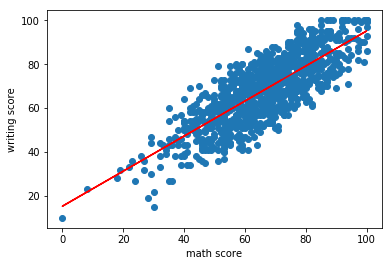

In [101]:
x = df["math score"].values.reshape(-1,1)
y = df["writing score"].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3)

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
y_head = linear_reg.predict(x)

print("train score ",linear_reg.score(x_train,y_train))
print("test score ",linear_reg.score(x_test,y_test))

plt.scatter(x,y)
plt.plot(x,y_head,color="red")
plt.xlabel("math score")
plt.ylabel("writing score")
plt.show()

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [39]:
new_data = df.drop(["race/ethnicity","parental level of education","test preparation course","lunch"],axis=1)
new_data.gender = [1 if i == "male" else 0 for i in new_data.gender]

In [40]:
x_data = new_data.drop(["gender"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
y = new_data.gender.values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [43]:
x = new_data.drop(["gender"],axis=1)
y = new_data.gender.values

pca = PCA(n_components=2, whiten=True)
pca.fit(x,y)
x_pca = pca.transform(x)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.90300119 0.08023457]
0.9832357568076846


Conlusion: If we look at the graph above mentioned we can see that there is not much difference in the regression of maths score and writing scores. Also we prefer that there should be minimum vertical distance between the data points. While predicting the percentage of male parents are educated, it came up with 19% of accuracy. According to the PCA, the accuracy is 98%.